In [27]:
!pwd

/ekaterina/work/src/lca/lca


In [28]:
'''
Assign the log file name.
'''

from tools import *

# Beluga

config_path = '/ekaterina/work/src/lca/lca/configs/config_beluga.yaml'
log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/beluga_kde_0.98_20241108_125221.log'
node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/beluga_kde_0.98/node2uuid_file.json'


#Giraffe

config_path = '/ekaterina/work/src/lca/lca/configs/config_giraffe.yaml'
log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/giraffe_smoothing_0.98_20241107_211535.log'
node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/giraffe_smoothing_0.98/node2uuid_file.json'


#Grevy's zebra

config_path = '/ekaterina/work/src/lca/lca/configs/config_grevyszebra.yaml'
log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/grevyszebra_kde_0.98_20241106_164351.log'
node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/grevyszebra_kde_0.98/node2uuid_file.json'


#Plains zebra

config_path = '/ekaterina/work/src/lca/lca/configs/config_plainszebra.yaml'
log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/plainszebra_fixed2_1.0_20241107_195511.log'
node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/plainszebra_fixed2_1.0/node2uuid_file.json'







In [29]:
from preprocess import load_to_df
config = get_config(config_path)
annotation_file = config['data']['annotation_file']
images_dir = config['data']['images_dir']

with open(node2uuid_path, 'r') as f:
    node2uuid = json.load(f)



df = load_to_df(annotation_file, format='old')

df['image_path'] = images_dir + '/' + df['file_name']

node2imagepath = {}
node2name = {}
node2bbox = {}
uuid_to_imagepath = df.set_index('uuid_x')['image_path'].to_dict()
uuid_to_name = df.set_index('uuid_x')['name'].to_dict()  
uuid_to_bbox = df.set_index('uuid_x')['bbox'].to_dict()  

for node, uuid in node2uuid.items():
    if uuid in uuid_to_imagepath:
        node2imagepath[int(node)] = uuid_to_imagepath[uuid]
        node2name[int(node)] = uuid_to_name[uuid]
        node2bbox[int(node)] = uuid_to_bbox[uuid]


print(node2imagepath)
print(node2name)



Merging on image uuid
** Loaded /ekaterina/work/data/plain_zebra/annotations/preprocessed/plain_zebra_singletons_encounters_notflipped.json **
      Found 745 annotations
{0: '/ekaterina/work/data/plain_zebra/images/train2020/000000004576.jpg', 1: '/ekaterina/work/data/plain_zebra/images/train2020/000000004210.jpg', 2: '/ekaterina/work/data/plain_zebra/images/train2020/000000003618.jpg', 3: '/ekaterina/work/data/plain_zebra/images/train2020/000000004571.jpg', 4: '/ekaterina/work/data/plain_zebra/images/train2020/000000003619.jpg', 5: '/ekaterina/work/data/plain_zebra/images/train2020/000000003615.jpg', 6: '/ekaterina/work/data/plain_zebra/images/train2020/000000004117.jpg', 7: '/ekaterina/work/data/plain_zebra/images/train2020/000000003537.jpg', 8: '/ekaterina/work/data/plain_zebra/images/train2020/000000003551.jpg', 9: '/ekaterina/work/data/plain_zebra/images/train2020/000000002093.jpg', 10: '/ekaterina/work/data/plain_zebra/images/train2020/000000003640.jpg', 11: '/ekaterina/work/dat

In [30]:
'''
Extract the log file lines.
'''
log_lines = []
fp = open(log_fn)
for line in fp:
    log_lines.append(line)
print(len(log_lines))

465655


In [31]:
'''
Get the initial edges that come from MIEWID
'''

import re

edges = []
edge_pattern = re.compile(r"a0:\s*(\d+),\s*a1:\s*(\d+),\s*s:([-\d.]+),\s*w:([-\d.]+)")


initial_edges = {}


for line in log_lines:

    match = edge_pattern.search(line)

    if match:
        a0 = int(match.group(1))
        a1 = int(match.group(2))
        score = float(match.group(3))
        weight = match.group(4)
        initial_edges[(a0, a1)] = (weight,score)

list(initial_edges.keys())[:5]






[(196, 543), (115, 675), (365, 527), (112, 134), (155, 220)]

In [32]:

'''
Get the inserted edges 
'''

import re

inserted_edges = {}
edge_pattern = re.compile(r"Inserting edge\s*\(\s*(\d+),\s*(\d+),\s*([-]?\d+)\s*\)")

for line in log_lines:
    match = edge_pattern.search(line)
    if match:
        a0 = int(match.group(1))
        a1 = int(match.group(2))
        w = int(match.group(3)) 
        if w!=100 and w!= -100: 
            inserted_edges[(a0, a1)] = w


list(inserted_edges.keys())[:5]





[(298, 700), (298, 701), (74, 536), (368, 665), (368, 707)]

Displaying images for edge: 208 -> 642, weight: 1, is same: False


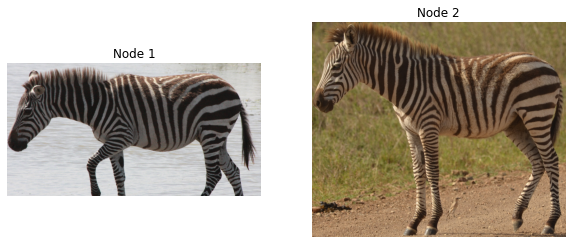

Displaying images for edge: 87 -> 536, weight: 1, is same: False


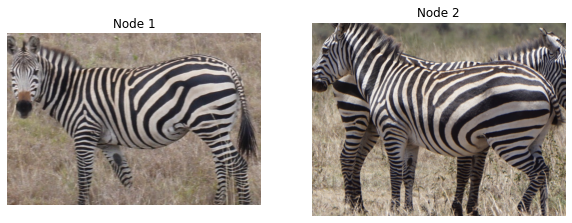

Displaying images for edge: 61 -> 62, weight: 1, is same: True


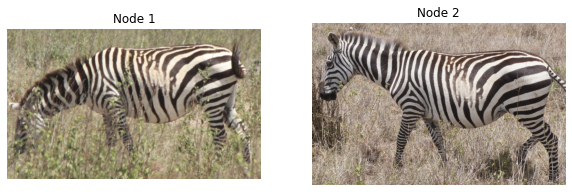

Displaying images for edge: 410 -> 607, weight: 1, is same: False


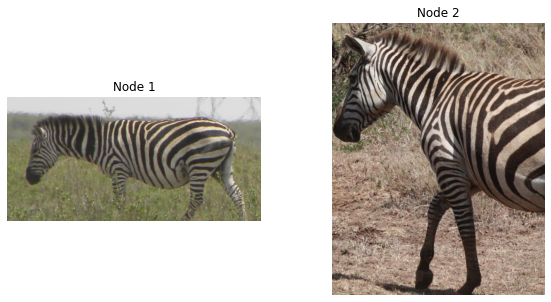

Displaying images for edge: 41 -> 69, weight: 1, is same: False


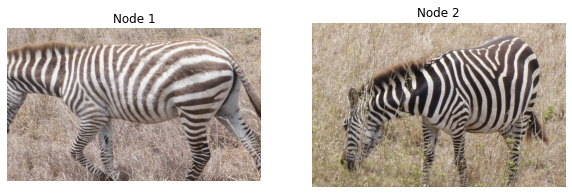

Displaying images for edge: 109 -> 388, weight: 1, is same: False


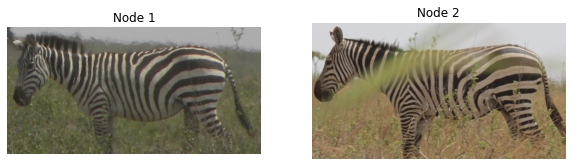

Displaying images for edge: 552 -> 667, weight: -1, is same: False


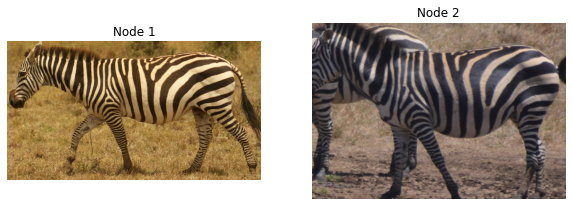

Displaying images for edge: 554 -> 667, weight: 2, is same: False


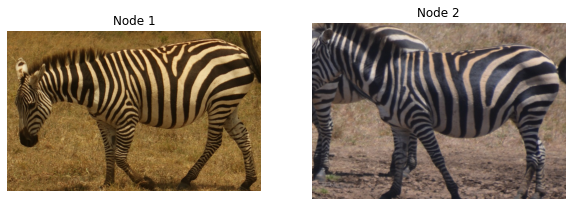

Displaying images for edge: 11 -> 17, weight: 1, is same: False


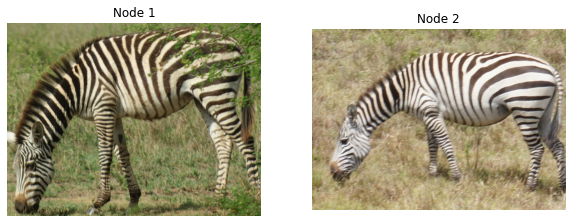

Displaying images for edge: 475 -> 578, weight: 2, is same: False


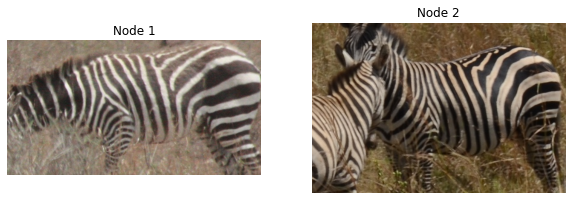

Displaying images for edge: 578 -> 591, weight: 2, is same: False


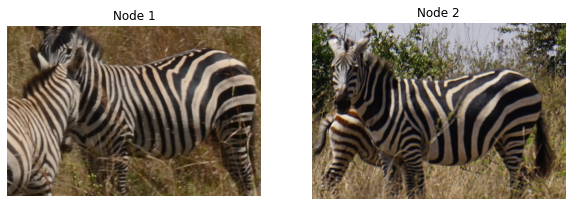

Displaying images for edge: 412 -> 413, weight: 2, is same: True


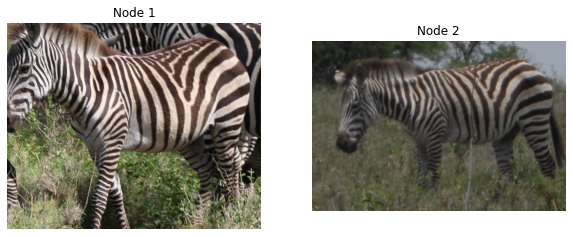

Displaying images for edge: 199 -> 200, weight: 2, is same: True


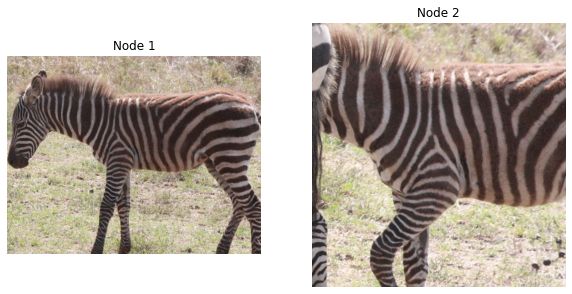

Displaying images for edge: 119 -> 481, weight: 0, is same: False


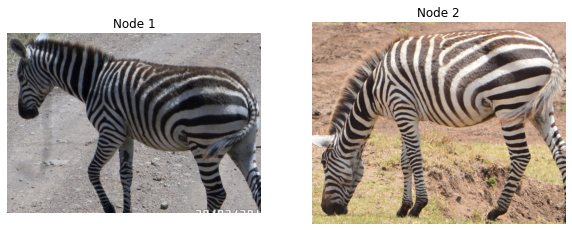

Displaying images for edge: 118 -> 481, weight: 2, is same: False


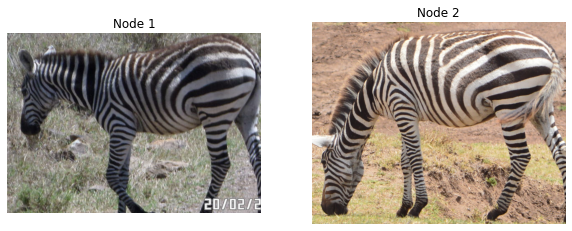

Displaying images for edge: 540 -> 630, weight: 2, is same: False


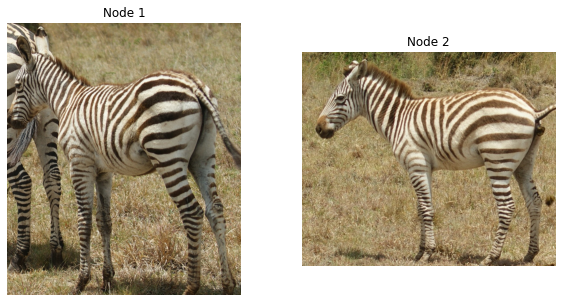

Displaying images for edge: 324 -> 603, weight: 2, is same: False


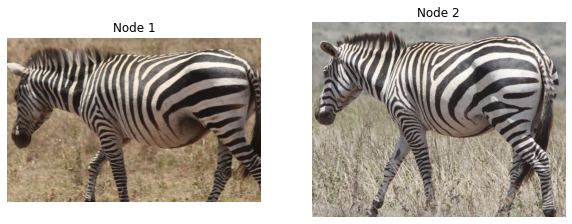

Displaying images for edge: 603 -> 619, weight: 1, is same: False


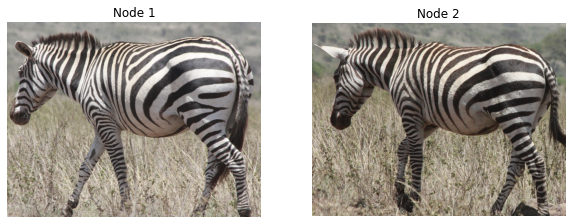

Displaying images for edge: 603 -> 620, weight: 2, is same: False


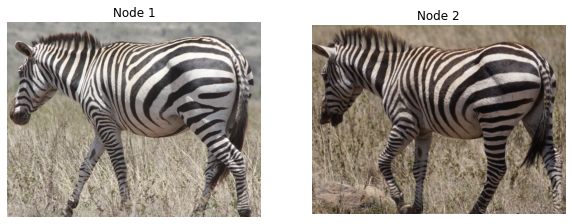

Displaying images for edge: 42 -> 150, weight: 3, is same: False


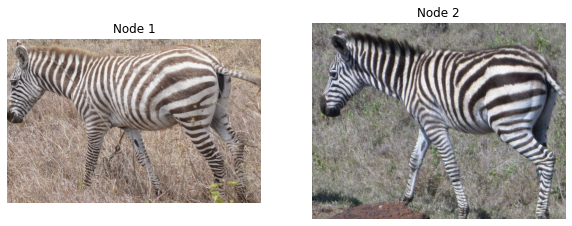

In [33]:
import re
from PIL import Image


human_edges = []
review_request_pattern = re.compile(r"Received\s+(\d+)\s+human review requests")
inserting_edge_pattern = re.compile(r"Inserting edge\s*\(\s*(\d+),\s*(\d+),\s*([-]?\d+)\s*\)")

i=0
while i < len(log_lines):
    match = review_request_pattern.search(log_lines[i])
    if match:
        # Get the number of requests
        N = int(match.group(1))
        # Read the next N lines for matching edges
        for j in range(1, N + 1):
            if i + j < len(log_lines):
                edge_match = inserting_edge_pattern.search(log_lines[i + j])
                if edge_match:
                    a0 = int(edge_match.group(1))
                    a1 = int(edge_match.group(2))
                    weight = int(edge_match.group(3))
                    key = (a0,a1)
                    if key in initial_edges.keys():
                        w = initial_edges[key][0]
                    elif key in inserted_edges.keys():
                        w = inserted_edges[key]
                    human_edges.append({'a0': a0, 'a1': a1, 'w': w})
        # Move the index past the N lines
        i += N
    else:
        i += 1


# print(len(human_edges))
# for edge in human_edges:
#     print(edge)

def show_image_pair(image1_path, image2_path, bbox1=None, bbox2=None):
    """
    Display a pair of cropped images side by side.
    Parameters:
        image1_path (str): Path to the first image.
        image2_path (str): Path to the second image.
        bbox1 (tuple): Bounding box for the first image (x0, y0, width, height).
        bbox2 (tuple): Bounding box for the second image (x0, y0, width, height).
    """
    # Load images
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)
    
    # Convert bbox format and crop images if bounding boxes are provided
    if bbox1:
        left1, upper1, right1, lower1 = bbox1[0], bbox1[1], bbox1[0] + bbox1[2], bbox1[1] + bbox1[3]
        img1 = img1.crop((left1, upper1, right1, lower1))
    if bbox2:
        left2, upper2, right2, lower2 = bbox2[0], bbox2[1], bbox2[0] + bbox2[2], bbox2[1] + bbox2[3]
        img2 = img2.crop((left2, upper2, right2, lower2))
    
    # Create a side-by-side plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].axis('off')  # Hide axes
    axes[0].set_title("Node 1")
    axes[1].imshow(img2)
    axes[1].axis('off')  # Hide axes
    axes[1].set_title("Node 2")
    plt.show()

# Iterate over human_edges and display image pairs
for edge in human_edges[:20]:
    node1= edge['a0']
    node2 = edge['a1']
    w = edge['w']
    if node1 in node2imagepath and node2 in node2imagepath:
        print(f"Displaying images for edge: {node1} -> {node2}, weight: {w}, is same: {node2name[node1] == node2name[node2]}")
        show_image_pair(node2imagepath[node1], node2imagepath[node2], node2bbox[node1], node2bbox[node2])
    else:
        print(f"Edge {node1} -> {node2} has missing image paths.")

In [34]:
print(i)

465655
